In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

# Carregar o dataset
file_path = '/content/drive/My Drive/calc/dataset.csv'
data = pd.read_csv(file_path)

# Definir as variáveis independentes e dependentes
X = data.drop(columns=['soma_depressao', 'indice_depressao'])
y = data['indice_depressao']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Aplicar regressão logística com validação cruzada 10-fold
model = LogisticRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=10)

# Exibir os resultados
print(f'Acurácia média em 10-fold cross-validation: {scores.mean()}')
print(f'Precisão em cada fold: {scores}')


Acurácia média em 10-fold cross-validation: 1.0
Precisão em cada fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

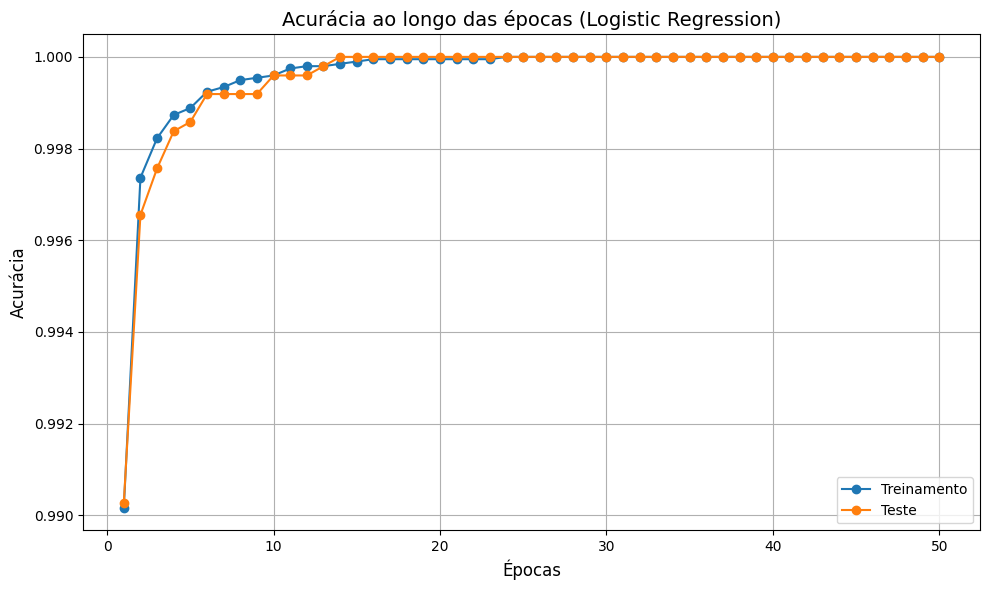

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para carregar e preparar os dados
def carregar_e_preparar_dados(file_path):
    data = pd.read_csv(file_path)
    X = data.drop(columns=['soma_depressao', 'indice_depressao'])
    y = data['indice_depressao']

    # Imputar valores faltantes
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Função para treinar Logistic Regression e capturar acurácias por épocas
def treinar_logistic_regression_por_epocas(X_train, y_train, X_test, y_test, n_epochs=50):
    modelo = LogisticRegression(max_iter=1, warm_start=True, solver='saga', random_state=42)
    treino_acuracias = []
    teste_acuracias = []

    for epoca in range(1, n_epochs + 1):
        modelo.fit(X_train, y_train)

        # Previsões e cálculo de acurácia
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        treino_acuracias.append(accuracy_score(y_train, y_train_pred))
        teste_acuracias.append(accuracy_score(y_test, y_test_pred))

    return treino_acuracias, teste_acuracias

# Função para plotar o gráfico de acurácias
def plotar_acuracia_por_epocas(treino_acuracias, teste_acuracias):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(treino_acuracias) + 1), treino_acuracias, label='Treinamento', marker='o')
    plt.plot(range(1, len(teste_acuracias) + 1), teste_acuracias, label='Teste', marker='o')
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Acurácia', fontsize=12)
    plt.title('Acurácia ao longo das épocas (Logistic Regression)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Caminho do arquivo de dados
file_path = '/content/drive/My Drive/calc/dataset.csv'

# Carregar e preparar os dados
X_train_scaled, X_test_scaled, y_train, y_test = carregar_e_preparar_dados(file_path)

# Treinar o modelo e capturar as acurácias
n_epochs = 50
treino_acuracias, teste_acuracias = treinar_logistic_regression_por_epocas(
    X_train_scaled, y_train, X_test_scaled, y_test, n_epochs
)

# Plotar o gráfico de acurácias
plotar_acuracia_por_epocas(treino_acuracias, teste_acuracias)
